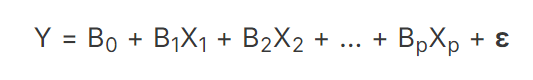

# Tasks involved in MLR
- Overfitting
- Multicollinearity
  - Pairwise Correlations
  - Variance Inflation Factor (VIF)
- Feature Selection

# Bias Variance Tradeoff
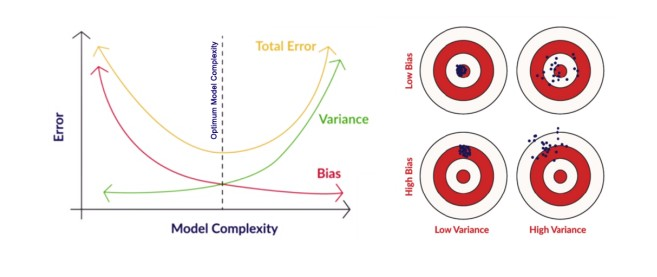

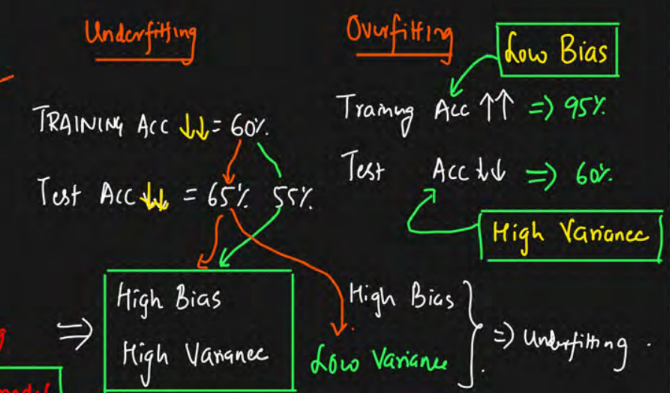

### To resolve overfitting
- Cross-validation
- If the training data is too small to train add more relevant and clean data.
- If the training data is too large, do some feature selection and remove unnecessary features.
- Regularization
  - LASSO (L1) It involves in reduction of model complexity by performing feature selection
  - RIDGE (L2) Adding small amount of bias to cost fn to ensure long term predictions
  - ElasticNet --which is combination of both L1 and L2

### To resolve underfitting
- Increase the model complexity
- Increase the number of features in the training data
- Remove noise from the data.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [13]:
df = pd.read_csv("Student_Performance.csv") 
df.sample(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
4822,3,97,No,6,4,75.0
6360,3,47,No,7,3,24.0
4791,6,52,No,6,4,35.0
1003,6,75,No,7,7,61.0
8886,5,62,No,9,1,43.0


In [14]:
df.count()

Hours Studied                       10000
Previous Scores                     10000
Extracurricular Activities          10000
Sleep Hours                         10000
Sample Question Papers Practiced    10000
Performance Index                   10000
dtype: int64

In [15]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [16]:
df["Extracurricular Activities"]=df["Extracurricular Activities"].replace(to_replace=['No', 'Yes'], value=[0, 1])

C:\Users\gopiv\AppData\Local\Temp\ipykernel_11500\114896861.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Extracurricular Activities"]=df["Extracurricular Activities"].replace(to_replace=['No', 'Yes'], value=[0, 1])


In [17]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [18]:
# sns.pairplot(df)

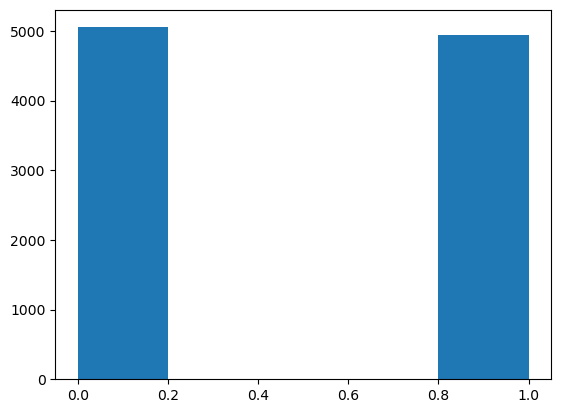

In [19]:
plt.hist(df['Extracurricular Activities'], bins=5)
plt.show()

In [20]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


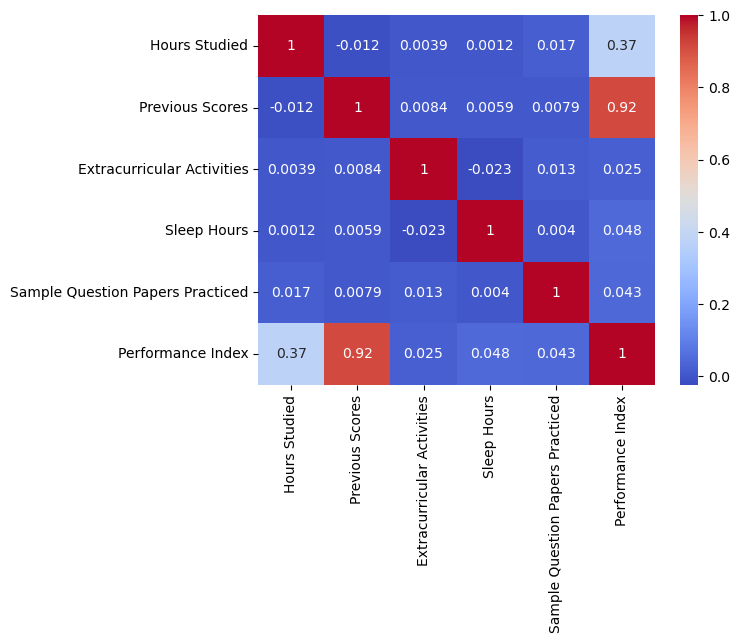

In [21]:

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

plt.show()

In [22]:

df.corr()['Performance Index'].sort_values()

Extracurricular Activities          0.024525
Sample Question Papers Practiced    0.043268
Sleep Hours                         0.048106
Hours Studied                       0.373730
Previous Scores                     0.915189
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [23]:

x = df.drop(['Performance Index'], axis = 1)
y = df['Performance Index']

In [24]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [25]:

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [26]:

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -34.06361405695109
Coefficients:


[('Hours Studied', 2.8423153687708536),
 ('Previous Scores', 1.01926179494042),
 ('Extracurricular Activities', 0.6260189199386814),
 ('Sleep Hours', 0.4799342594447951),
 ('Sample Question Papers Practiced', 0.19449363514992035)]

In [27]:

y_pred_mlr= mlr.predict(x_test)

Text(0.5, 1.0, 'Testing score')

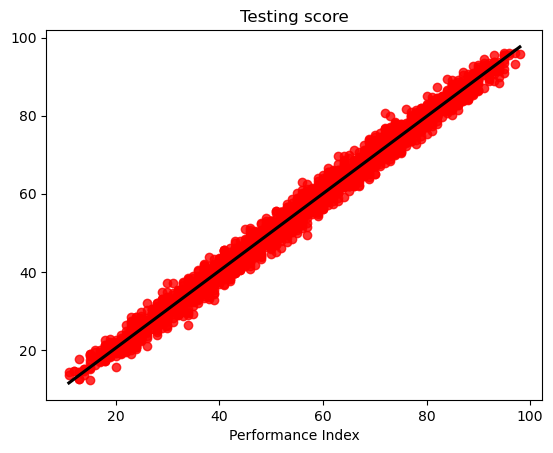

In [34]:
sns.regplot(x=y_test,y=y_pred_mlr,ci=None,color ='red',line_kws={"color": "black"});
plt.title('Testing score')

<Axes: ylabel='Difference'>

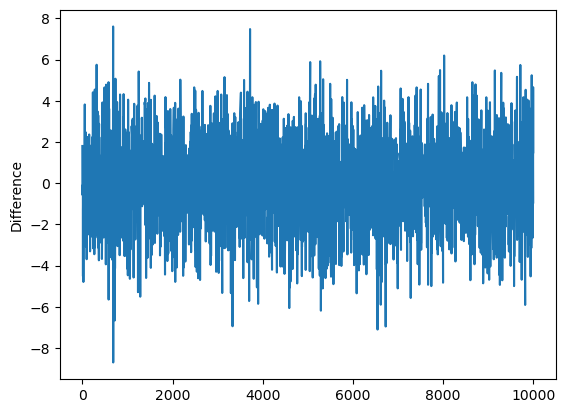

In [29]:

pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred_mlr,'Difference':y_test-y_pred_mlr})
# pred_df
sns.lineplot(pred_df['Difference'])

In [30]:
pred_df

,Actual Value,Predicted Value,Difference
8018,65.0,65.988641,-0.988641
9225,51.0,48.509955,2.490045
3854,35.0,36.161642,-1.161642
2029,97.0,93.338698,3.661302
3539,87.0,84.913996,2.086004
...,...,...,...
4208,69.0,68.319061,0.680939
5335,60.0,60.418134,-0.418134
2554,73.0,71.165320,1.834680
13,33.0,33.204307,-0.204307


In [31]:

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 98.87
Mean Absolute Error: 1.6420986366675885
Mean Square Error: 4.277204120194013
Root Mean Square Error: 2.0681402564125126


In [32]:
# Predicting Test Set
Performance_Index= mlr.predict([[7,99,0,9,9]])
print(Performance_Index)

[92.80936227]


C:\Users\gopiv\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
